In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame()

In [5]:
df['X'] = X.reshape(100)
df['y'] = y

In [6]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


In [7]:
df['pre1'] = df['y'].mean()

In [8]:
df

,X,y,pre1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [9]:
df['res1'] = df['y'] - df['pre1']

In [10]:
df

,X,y,pre1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


Text(0.5, 1.0, 'X vs res1')

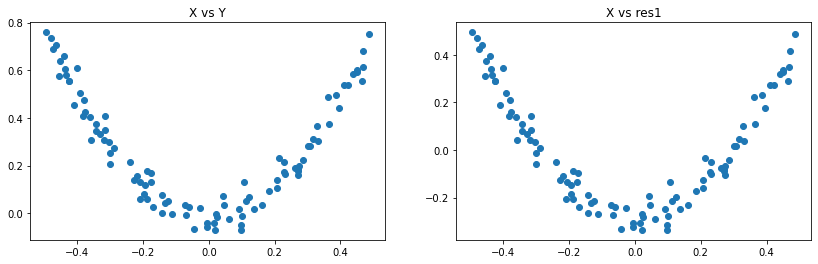

In [51]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

plt.subplot(122)
plt.scatter(df['X'],df['res1'])
plt.title('X vs res1')



In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [13]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=8,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(136.96363636363637, 199.32, 'X[0] <= -0.36\nmse = 0.056\nsamples = 100\nvalue = -0.0'),
 Text(60.872727272727275, 163.07999999999998, 'X[0] <= -0.43\nmse = 0.012\nsamples = 18\nvalue = 0.309'),
 Text(30.436363636363637, 126.83999999999999, 'mse = 0.004\nsamples = 9\nvalue = 0.395'),
 Text(91.30909090909091, 126.83999999999999, 'mse = 0.005\nsamples = 9\nvalue = 0.222'),
 Text(213.05454545454546, 163.07999999999998, 'X[0] <= 0.322\nmse = 0.04\nsamples = 82\nvalue = -0.068'),
 Text(152.1818181818182, 126.83999999999999, 'X[0] <= -0.235\nmse = 0.016\nsamples = 67\nvalue = -0.142'),
 Text(121.74545454545455, 90.6, 'mse = 0.003\nsamples = 12\nvalue = 0.041'),
 Text(182.61818181818182, 90.6, 'X[0] <= 0.211\nmse = 0.009\nsamples = 55\nvalue = -0.182'),
 Text(152.1818181818182, 54.359999999999985, 'X[0] <= -0.172\nmse = 0.005\nsamples = 42\nvalue = -0.223'),
 Text(121.74545454545455, 18.119999999999976, 'mse = 0.002\nsamples = 10\nvalue = -0.144'),
 Text(182.61818181818182, 18.1199999999

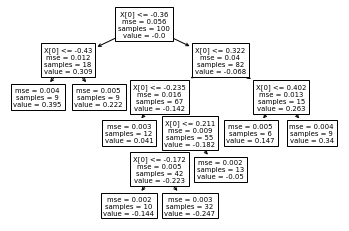

In [14]:
from sklearn.tree import plot_tree
plot_tree(tree1)

In [19]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

In [25]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

In [26]:
y_pred.shape

(500,)

Text(0.5, 1.0, 'X vs y')

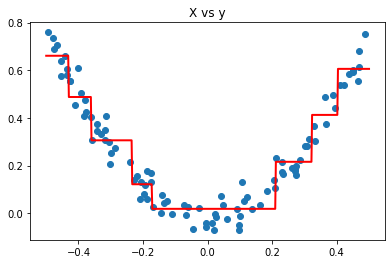

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [16]:
df['pre2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [17]:
df

,X,y,pre1,res1,pre2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [28]:
df['res2'] = df['y'] - df['pre2']

In [29]:
df

,X,y,pre1,res1,pre2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [30]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [31]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=8,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Text(0.5, 1.0, 'X vs res2')

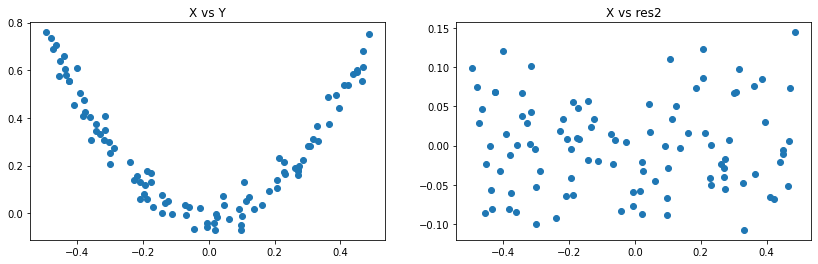

In [66]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

plt.subplot(122)
plt.scatter(df['X'],df['res2'])
plt.title('X vs res2')

In [32]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

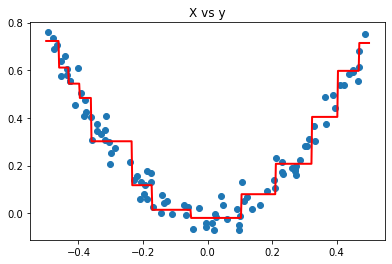

In [33]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')